In [1]:
from SpectraGenerator.spectragenerator import SpectraGenerator
from SpectraProcessing.spectraprocessing import branchClassification, plotSpectrum
from SpectraFit.spectrafit import filterLine,singleLineFit, multipleLineFit

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

HAPI version: 1.2.2.3
To get the most up-to-date version please check http://hitran.org/hapi
ATTENTION: Python versions of partition sums from TIPS-2021 are now available in HAPI code

           MIT license: Copyright 2021 HITRAN team, see more at http://hitran.org. 

           If you use HAPI in your research or software development,
           please cite it using the following reference:
           R.V. Kochanov, I.E. Gordon, L.S. Rothman, P. Wcislo, C. Hill, J.S. Wilzewski,
           HITRAN Application Programming Interface (HAPI): A comprehensive approach
           to working with spectroscopic data, J. Quant. Spectrosc. Radiat. Transfer 177, 15-30 (2016)
           DOI: 10.1016/j.jqsrt.2016.03.005

           ATTENTION: This is the core version of the HITRAN Application Programming Interface.
                      For more efficient implementation of the absorption coefficient routine, 
                      as well as for new profiles, parameters and other functional,
      

# Simulando espectros e processando espectros

Inicializando
Using SpectraGenerator/hitran_database

H35Cl
                     Lines parsed: 334
H37Cl
                     Lines parsed: 340
{'air': 0, 'self': 1}
4.478937 seconds elapsed for abscoef; nlines = 334


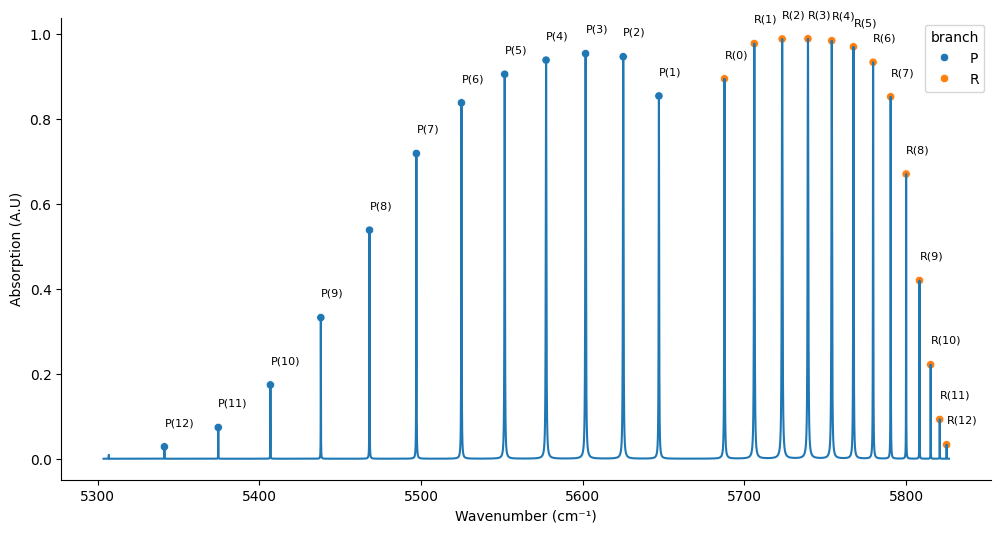

In [11]:
s = SpectraGenerator()

pressure = 0.5  #atm
temperature = 296 # Kelvin

optical_length = 10 #cm

#Simulando o espectro
s.simulateSpectra('H35Cl',{'air':0, 'self':1}, {'l':optical_length,'p':pressure,'T':temperature})

# Organizando as linhas
lines = branchClassification(s.spectra, findPeaksParams={'height':0},thresoldBranch=5665)

lines['pressure'] = pressure
lines['temperature'] = temperature

# Realizando o fit das linhas pelo perfil de Voigt

plotSpectrum(s.spectra,lines)

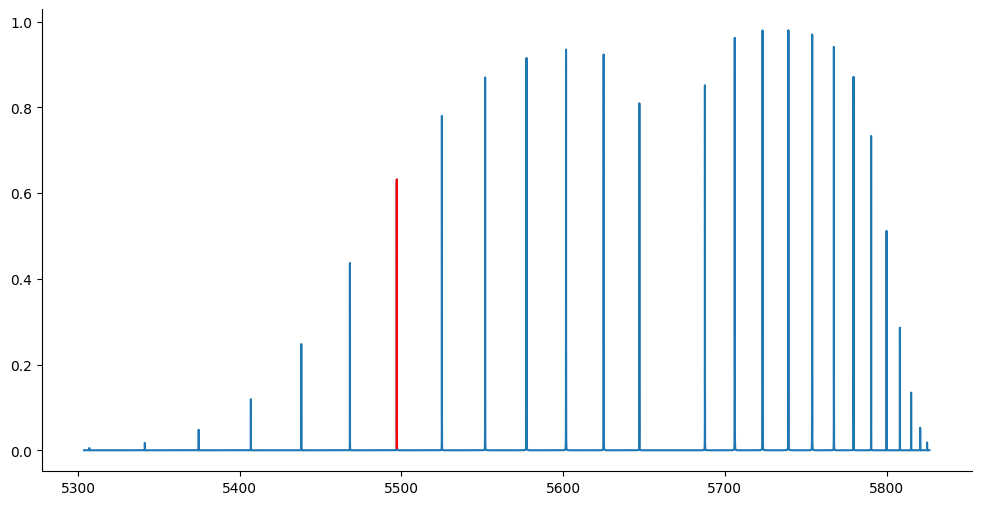

In [8]:
x,y = filterLine(s.spectra,lines.loc[5,'wavenumber'],lines.loc[5,'absorption'],0.01)

plt.plot(s.spectra['wavenumbers'],s.spectra['absorption'])
plt.plot(x,y,c='red')
plt.show()


chute= 8e-3
final, result, params, successful = singleLineFit(y, x, lines.loc[5,'wavenumber'],chute, chute, vgamma=True, vsigma=True)

plt.scatter(x=x,y=y)
plt.plot(x,final,c='red')
plt.show()
result